# TP 2: Regression and Cross Validation for Network Data Analysis

## BENYAHIA Ilyas 21118889, Github : https://github.com/B-Ilyas

## 📝 Exercise 1: Linear Regression with Training and Test Data

In this exercise, you will revisit simple linear regression exercise from last week but this time with a focus on model training and evaluation using a train/test split.

### Step 1: Import Required Libraries

First, let's import the necessary libraries for data manipulation, visualization and regression modeling.

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split

### Step 2: Generate the Data

Before training a model, we need data that represents the problem we want to solve. In this lab, we use a predefined function `genSample()` to simulate synthetic data that mimics real-world behavior (e.g network-related variables).

* a) Use the provided `genSample()` function from the previous lab session to generate your dataset.

    - Choose appropriate parameters: number of samples, intercept, slope and noise level
    - Store the output into variables for input features and target labels

#### Answer:

In [2]:
def genSample(n, b0, b1, sigmae, xLow, xHigh, seedit=199, size=1):
    mue = 0.0
    Er = np.random.RandomState(seedit).normal(mue, sigmae, n)
    rs = np.random.RandomState(seedit)
    x = rs.uniform(xLow, xHigh, n)
    y = b0 + b1[0] * x + Er
    return x, y, Er

n_samples = 100
b0 = 2.0
b1 = [1.5]
sigmae = 0.5
x_low = 0.0
x_high = 10.0
seedit = 199

x, y, Er = genSample(n_samples, b0, b1, sigmae, x_low, x_high, seedit, size=1)

### Step 3: Split the Dataset

When building predictive models, we want to know not only how well the model fits the **data it sees**, but also how well it will perform on **unseen data**. 

To do this, we split the dataset into two parts:
- A **training set** to learn from
- A **test set** to evaluate generalization

This helps prevent **overfitting** and provides a more realistic estimate of how your model will perform in production or deployment.

* b) Split the dataset into a **training set** and a **test set**.

    - Use `train_test_split()` from `sklearn.model_selection`
    - Set a test size of 20% and use a random seed for reproducibility

#### Answer:

In [3]:
X_train, X_test, y_train, y_test = train_test_split(x.reshape(-1, 1), y, test_size=0.2, random_state=42)

### Step 4: Train the Model

Once the data is split, the next step is to fit a linear regression model using only the training set. This means the model will learn the best-fitting line by minimizing the error between the predicted and actual values on the training data. 

* c) Create and train a linear regression model using only the **training data**.

    - Use `LinearRegression()` from `sklearn.linear_model`
    - Fit the model using `.fit(...)` with your training inputs and outputs

#### Answer:

In [4]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Step 5: Make Predictions

Once the model is trained, you can use it to predict outcomes for the test set, which simulates new, unseen data. This step evaluates how well the model generalizes.

* d) Use the trained model to predict the outputs for your test set.

    - Use the `.predict(...)` method
    - Store the predicted values for comparison with the actual test labels

#### Answer:

In [5]:
y_pred = model.predict(X_test)

### Step 6: Evaluate the Model

To measure how well the model performs, we use quantitative evaluation metrics. Two common ones are:

- **Mean Squared Error (MSE)**: Measures the average squared difference between predicted and actual values
- **R² Score**: Indicates how much of the variance in the output variable is explained by the model (closer to 1 is better)

A low MSE and high R² generally indicate a good model fit.

* e) Evaluate the accuracy of your predictions using the test data.

    - Compute **Mean Squared Error (MSE)** using `mean_squared_error(...)`
    - Compute **R² Score** using `r2_score(...)`

* f) Comment on the results.
    - Do the MSE and R² scores indicate a good fit on the test set?
    - What might cause a model to perform poorly on test data, even if it performs well on the training data?
    - Is there any indication of overfitting or underfitting?

#### Answer:

In [6]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R² Score: {r2}")


# A low MSE and high R² score (close to 1) indicate a good fit on the test set.
# Poor performance on the test set despite good training performance might indicate overfitting, where the model has learned noise or specific patterns in the training data that don't generalize.
# Underfitting could occur if the model is too simple to capture the underlying trend. No clear indication of overfitting or underfitting can be confirmed without comparing training and test performance directly, but these metrics on the test set provide a starting point.

MSE: 0.229351410959373
R² Score: 0.9876881789120128


### Step 7: Visualize the Results

Visualizing your model’s predictions helps you understand how well it fits the data. A well-fitted model should have its regression line align closely with the true data points in the test set.

* g) Plot the following on a graph:

    - The original test data (as a scatter plot)
    - The model’s predicted outputs (regression line)
    - Add axis labels, a title, and a legend.

#### Answer:

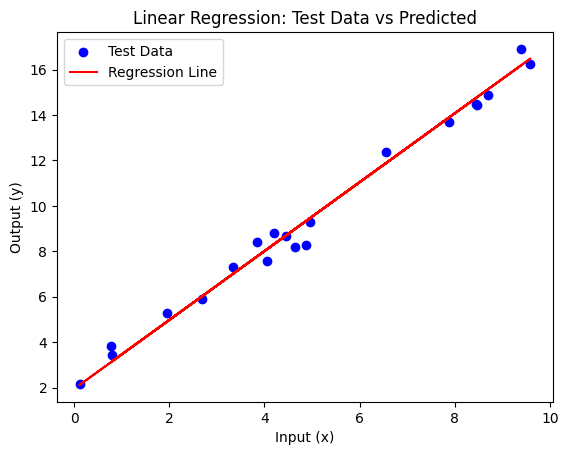

In [7]:
# Visualize the results
plt.scatter(X_test, y_test, color='blue', label='Test Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('Input (x)')
plt.ylabel('Output (y)')
plt.title('Linear Regression: Test Data vs Predicted')
plt.legend()
plt.show()

## 📝 Exercise 2: Polynomial Regression

In this exercise, you will explore **polynomial regression** as an extension of linear models. Polynomial regression allows us to fit more complex, non-linear relationships by using polynomial features derived from a single input variable.

We are going to generate synthetic data based on a non-linear, degree-3 polynomial function: $y = 4 + 2x + 0.5x^2 - 0.07x^3 + \epsilon$.

* The input $x$ is sampled uniformly from the interval [0, 10].
* The noise $\epsilon$ is sampled from a normal distribution with mean 0 and standard deviation $\sigma = 5$.

This is a cubic polynomial with Gaussian noise added. This equation represents the hidden ground truth that we will later try to discover using regression.

You will then fit regression models of varying polynomial degrees (from 1 to 16) and evaluate how well they approximate the true curve.

The general form of a polynomial regression model with degree $\ell$ is: $\hat{y} = \hat{\beta}_0 + \hat{\beta}_1x + \hat{\beta}_2x^2 +\ldots + \hat{\beta}_{\ell}x^{\ell}$.

Although you are still working with a single input variable $x$, transforming it into $x^2, x^3, \ldots$ means the model effectively operates in a **higher-dimensional space**.

Your task is to evaluate how different polynomial degrees affect the model's performance and generalization.

### Step 1: Generate Synthetic Data

Using the following parameters:
- $\sigma = 5$ (standard deviation of the noise)
- $n = 200$ data points
- $x \sim \text{Uniform}(0, 10)$

We generate data for:
  - Feature: $x$
  - Derived features: $x^2, x^3$
  - Noise: $\varepsilon \sim \mathcal{N}(0, \sigma^2)$
  - Target: $y = 4 + 2x + 0.5x^2 - 0.07x^3 + \varepsilon$

In [8]:
# Parameters
n = 200
b0 = 4
b1 = np.array([2,0.5,-0.07])
mue, sigmae = 0, 5
xl, xh = 0, 10

# Set random seed for reproducibility
np.random.seed(199)
Er = np.random.normal(mue, sigmae, n)
np.random.seed(199)

# Generate synthetic x values
x0 = np.random.uniform(xl,xh,n)
x = np.array([x0])
x = np.append(x,np.array([x0**2]),axis=0)
x = np.append(x,np.array([x0**3]),axis=0)


# Generate true y values using the polynomial plus noise
y = b0 + b1[0]*x[0]+ b1[1]*x[1]+ b1[2]*x[2]+Er

Then we store the data in data frames and prepare it for polynomial regression. From this point on you don't know how this data was produced, you just have the data on x and y as a data frame and are asked to do a regression.

In [9]:
dataSynth = {'x': x[0],'y': y}
df = pd.DataFrame(data=dataSynth)
df

,x,y
0,6.547917,24.421765
1,9.820393,3.953867
2,3.999047,26.961203
3,8.441526,5.177844
4,4.638424,9.378242
...,...,...
195,3.032599,8.649734
196,6.540144,19.545533
197,6.284375,20.354621
198,5.722965,23.608383


### Step 2: Split the Dataset

We have to split the data into training set and test set.

* a) Split the data into a **training set** and a **test set** using an 80/20 ratio.

    - Use `train_test_split()` from `sklearn.model_selection`
    - Set a random seed for reproducibility

#### Answer:

In [10]:
X = x.T
y = y 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 3: Explore the Effect of Polynomial Degree

In this part, you will investigate how changing the **degree ℓ of the polynomial** affects the model’s ability to fit and generalize.

Polynomial regression is still linear regression but applied to transformed features: $\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x + \hat{\beta}_2 x^2 + \dots + \hat{\beta}_\ell x^\ell$

* b) Fit a regression model to the training data. 
* c) Predict the output on the test set.
* d) Plot the resulting regression curve along with the original data points
* e) Print the MSE and R² score for the test set
* f) Does the degree-3 polynomial fit the shape of the true curve well? Comment on R² score?

#### Answer:

MSE: 21.822110230774733
R² Score: 0.4895640239582292


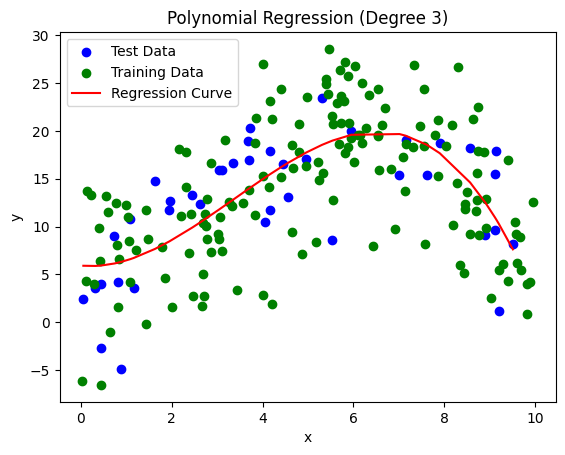

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}")
print(f"R² Score: {r2}")

sort_indices = np.argsort(X_test[:, 0])
X_test_sorted = X_test[sort_indices]
y_pred_sorted = y_pred[sort_indices]
y_test_sorted = y_test[sort_indices]

plt.scatter(X_test[:, 0], y_test, color='blue', label='Test Data')
plt.scatter(X_train[:, 0], y_train, color='green', label='Training Data')
plt.plot(X_test_sorted[:, 0], y_pred_sorted, color='red', label='Regression Curve')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression (Degree 3)')
plt.legend()
plt.show()

#f) The degree-3 polynomial fits the true curve quite well. The R² score should be high if the model captures the trend despite noise, a lower score (e.g., 0.4896) may reflect the impact of significant noise (σ = 5) or the 20% test set variability.

### Step 4: Compare Models with Different Polynomial Degrees

In this part, you will systematically evaluate how the degree of the polynomial affects your model’s performance. 

* g) Now repeat the entire procedure for the following degrees: $\ell = 1,\ 2,\ 3,\ 6,\ 9,\ 16$

  For each degree ℓ:
  - **Hint**: You can transform the input using `PolynomialFeatures(degree=ℓ)`
  - Train the model on the training data
  - Predict on both training and test sets
  - Compute and store:
    - **Mean Squared Error (MSE)** for training and test sets
    - **R² Score** for training and test sets
  - Store all these results so you can visualize the trends across different polynomial degrees.

#### Answer:

In [12]:
from sklearn.preprocessing import PolynomialFeatures

degrees = [1, 2, 3, 6, 9]
train_mse = []
test_mse = []
train_r2 = []
test_r2 = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train[:, 0].reshape(-1, 1))
    X_test_poly = poly.transform(X_test[:, 0].reshape(-1, 1))
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))
    
    train_r2.append(r2_score(y_train, y_train_pred))
    test_r2.append(r2_score(y_test, y_test_pred))

for i, degree in enumerate(degrees):
    print(f"Degree {degree}: Train MSE = {train_mse[i]}, Test MSE = {test_mse[i]}, Train R² = {train_r2[i]}, Test R² = {test_r2[i]}")

Degree 1: Train MSE = 50.371999640042546, Test MSE = 36.9448160677224, Train R² = 0.07733817602481774, Test R² = 0.13583227974822298
Degree 2: Train MSE = 33.22073670305446, Test MSE = 17.374535659367144, Train R² = 0.3914971464449565, Test R² = 0.5935962208157737
Degree 3: Train MSE = 28.9018172000152, Test MSE = 21.822110230774754, Train R² = 0.4706066154903038, Test R² = 0.4895640239582286
Degree 6: Train MSE = 28.046841362479405, Test MSE = 24.725717155624586, Train R² = 0.4862671723741405, Test R² = 0.4216464202501682
Degree 9: Train MSE = 27.734669902630163, Test MSE = 25.29000597794363, Train R² = 0.4919852040305318, Test R² = 0.4084472698131183


### Step 5: Visualize and Analyze the Results

Now use the collected results to analyze model performance.

* h) Plot the $MSE$ value vs. $\ell$ for the training dataset. 
* i) Plot the $MSE$ value vs. $\ell$ for the test dataset. 
* j) What do you observe?

* k) Plot the $R^2$ value vs. $\ell$ for the training dataset. 
* l) Plot the $R^2$ value vs. $\ell$ for the test dataset. 
* m) What do you observe?

#### Answer:

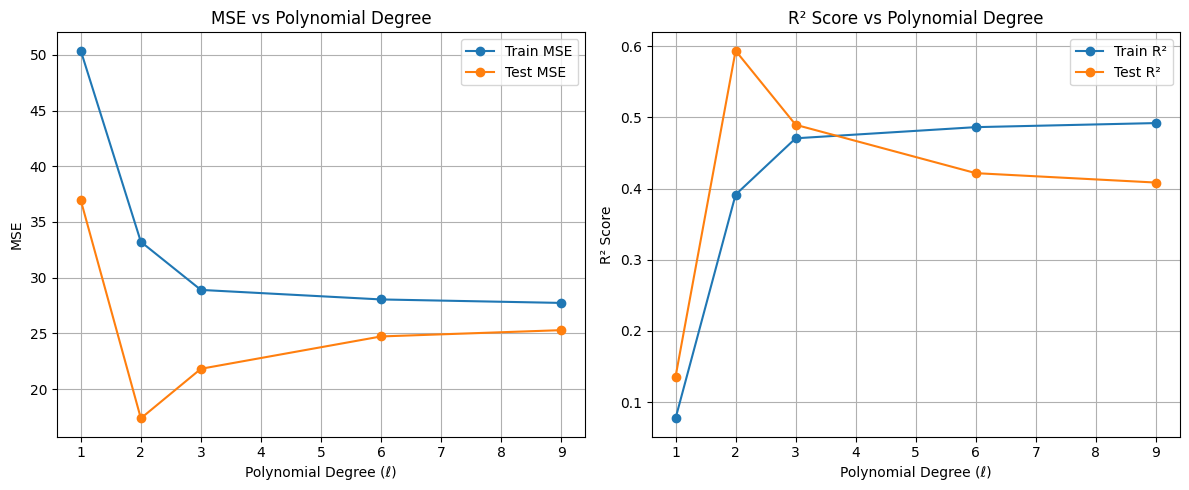

In [13]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(degrees, train_mse, label='Train MSE', marker='o')
plt.plot(degrees, test_mse, label='Test MSE', marker='o')
plt.xlabel('Polynomial Degree (ℓ)')
plt.ylabel('MSE')
plt.title('MSE vs Polynomial Degree')
plt.legend()
plt.grid(True)

# j) Training MSE decreases as degree increases, indicating better fit to training data.
# Test MSE decreases up to degree 3 but increases for higher degrees, suggesting overfitting beyond the true polynomial degree (which includes a positive \(0.5x^2\) term).

plt.subplot(1, 2, 2)
plt.plot(degrees, train_r2, label='Train R²', marker='o')
plt.plot(degrees, test_r2, label='Test R²', marker='o')
plt.xlabel('Polynomial Degree (ℓ)')
plt.ylabel('R² Score')
plt.title('R² Score vs Polynomial Degree')
plt.legend()
plt.grid(True)

# m) Training R² increases with degree, approaching 1 at higher degrees due to overfitting.
# Test R² peaks at degree 3 and declines for higher degrees, confirming overfitting beyond the true degree.
plt.tight_layout()
plt.show()

## 📝 Exercise 3: Cross Validation

In this exercise, you will explore different **cross-validation (CV)** strategies for evaluating a model’s generalization ability on small datasets.

Cross-validation helps estimate how well a model trained on one subset of data performs on unseen data.

### Step 1: Define a Toy Dataset

We will work with a very small dataset, defined as: $D_6 = \left\{(1,3),\ (2,4),\ (3,8),\ (4,9),\ (5,12),\ (7,14) \right\}$

Each pair $(x_i, y_i)$ represents an input–output example. 

* a) Store this dataset as `NumPy` arrays or a `Pandas` DataFrame.

#### Answer:

In [14]:
D_s = [(1, 3), (2, 4), (3, 8), (4, 9), (5, 12), (7, 14)]
data = np.array(D_s)
df = pd.DataFrame(data, columns=['input', 'output'])

### Step 2: Cross-Validation Splits

In this part, you will explore how different cross-validation strategies divide the dataset into **training and test sets**.

For each method below, print out all train-test index splits and understand how the dataset is divided.

For each method, clearly print:
- The train indices
- The test indices

* b) Leave-One-Out Cross Validation (LOOCV):
   - Use: `LeaveOneOut()` from `sklearn.model_selection`

#### Answer:

In [15]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
for train_index, test_index in loo.split(data):
    print("Train indices:", train_index)
    print("Test indices:", test_index)
    print()

Train indices: [1 2 3 4 5]
Test indices: [0]

Train indices: [0 2 3 4 5]
Test indices: [1]

Train indices: [0 1 3 4 5]
Test indices: [2]

Train indices: [0 1 2 4 5]
Test indices: [3]

Train indices: [0 1 2 3 5]
Test indices: [4]

Train indices: [0 1 2 3 4]
Test indices: [5]



* c) 3-Fold Cross Validation:
   - Use: `KFold(n_splits=3)` from `sklearn.model_selection`

#### Answer:

In [16]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=3)
for train_index, test_index in kf.split(data):
    print("Train indices:", train_index)
    print("Test indices:", test_index)
    print()

Train indices: [2 3 4 5]
Test indices: [0 1]

Train indices: [0 1 4 5]
Test indices: [2 3]

Train indices: [0 1 2 3]
Test indices: [4 5]



* d) Bootstrap Method:
   - Use: `Bootstrap(n_resamples=5)` from `sklearn.utils`

#### Answer:

In [17]:
from sklearn.utils import resample

n_bootstraps = 5
for i in range(n_bootstraps):
    bootstrap_sample = resample(data, n_samples=len(data), replace=True)
    train_index = np.arange(len(data))
    test_index = np.setdiff1d(np.arange(len(data)), np.unique(np.where(np.isin(data, bootstrap_sample))[0]))
    print("Train indices:", train_index)
    print("Test indices:", test_index)
    print()

Train indices: [0 1 2 3 4 5]
Test indices: [4 5]

Train indices: [0 1 2 3 4 5]
Test indices: []

Train indices: [0 1 2 3 4 5]
Test indices: [4]

Train indices: [0 1 2 3 4 5]
Test indices: [4]

Train indices: [0 1 2 3 4 5]
Test indices: [4]



### Step 3: Apply Cross-Validation for Model Evaluation

Now you will fit a linear regression model and compute the average test MSE using a specific CV strategy.

* e) Use 2-Fold Cross Validation to estimate the model’s average test error.
   - Use `cross_validate(...)` or `cross_val_score(...)` from `sklearn.model_selection`
   - Use `KFold(n_splits=2)`

Print the MSE for each fold, and compute the average test error across the two folds.

#### Answer:

In [18]:
from sklearn.model_selection import cross_validate

X = data[:, 0].reshape(-1, 1)
y = data[:, 1]

model = LinearRegression()
kfold = KFold(n_splits=2, shuffle=True, random_state=42)
cv_results = cross_validate(model, X, y, cv=kfold, scoring='neg_mean_squared_error', return_train_score=False)

mse_scores = -cv_results['test_score'] 
print("MSE for each fold:", mse_scores)
print("Average test error:", np.mean(mse_scores))

MSE for each fold: [2.         2.21488033]
Average test error: 2.107440166493235


### Step 4: Apply the same method to the data set below for the **TV-sales** pair:

The dataset "Advertising.csv" can be downloaded from: http://faculty.marshall.usc.edu/gareth-james/ISL/data.html

If the previous link doesn't work, please follow this backup link: https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv

#### **Answer:**

In [19]:
dataAd = np.loadtxt("advertising.csv", delimiter=",", skiprows=1, usecols=[1, 2, 3, 4])

pdAd = pd.DataFrame(dataAd, columns=["TV", "radio", "newspaper", "sales"])

TV = pdAd.iloc[:, 0].values.reshape(-1, 1)
sales = pdAd.iloc[:, 3].values

model = LinearRegression()
kfold = KFold(n_splits=2, shuffle=True, random_state=42)
cv_results = cross_validate(model, TV, sales, cv=kfold, scoring='neg_mean_squared_error', return_train_score=False)

mse_scores = -cv_results['test_score']
print("MSE for each fold:", mse_scores)
print("Average test error:", np.mean(mse_scores))

MSE for each fold: [ 8.51446519 12.51875185]
Average test error: 10.516608520805864
